In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

file1 = "Resources/Hot 100 Audio Features.csv"
file2 = "Resources/Hot Stuff.csv"

audio_features = pd.read_csv(file1)
hot100 = pd.read_csv(file2)

merge_df = pd.merge(audio_features, hot100, on=["Song", "Performer", "SongID"], how="outer")

merge_df = merge_df.drop(["SongID", "spotify_track_id", "spotify_track_preview_url",
                         "spotify_track_album", "spotify_track_explicit", "time_signature",
                        "url", "key", "mode", "acousticness", "liveness", "valence"], axis=1)
merge_df.groupby(["Performer","Song"]).sum().describe()

,spotify_track_duration_ms,spotify_track_popularity,danceability,energy,loudness,speechiness,instrumentalness,tempo,Week Position,Instance,Previous Week Position,Peak Position,Weeks on Chart
count,2.848600e+04,28486.000000,28486.000000,28486.000000,28486.000000,28486.000000,28486.000000,28486.000000,28486.000000,28486.000000,28486.000000,28486.000000,28486.000000
mean,2.258612e+06,466.694552,6.024673,6.204216,-82.494601,0.698791,0.280947,1180.147031,571.636523,12.117742,487.515200,469.003405,103.446676
std,2.285391e+06,627.170960,6.141261,6.410285,79.457468,1.281801,1.524263,1145.394736,351.718622,11.239813,343.631383,299.590598,160.677734
min,0.000000e+00,0.000000,0.000000,0.000000,-986.688000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.748695e+05,36.000000,1.016000,0.929250,-124.235750,0.099400,0.000000,220.667500,334.000000,5.000000,264.000000,269.000000,15.000000
50%,1.620852e+06,216.500000,4.496000,4.494000,-67.930000,0.362700,0.000000,960.012000,511.000000,10.000000,434.000000,421.000000,55.000000
75%,3.588318e+06,715.000000,9.240000,9.566500,-13.581000,0.715875,0.001593,1802.855250,748.750000,17.000000,661.000000,600.000000,136.000000
max,3.079157e+07,9360.000000,78.208000,94.016000,11.455000,29.820000,48.111000,14148.264000,4186.000000,416.000000,4070.000000,3886.000000,3828.000000


In [47]:
df2 = merge_df.dropna()[['danceability', 'tempo']]
df2.head(1000)

,danceability,tempo
1,0.734,80.002
19,0.572,95.799
20,0.572,95.799
21,0.572,95.799
22,0.572,95.799
...,...,...
1181,0.667,92.043
1182,0.667,92.043
1183,0.667,92.043
1184,0.667,92.043


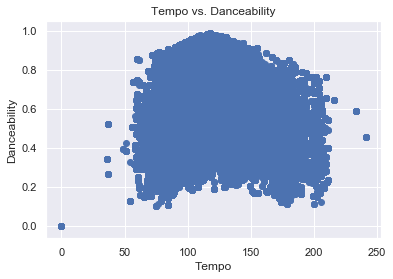

In [48]:
plt.scatter(df2["tempo"], df2["danceability"], marker="o")

plt.title(f'Tempo vs. Danceability')
plt.ylabel("Danceability")
plt.xlabel("Tempo")

# Show plot
plt.show();

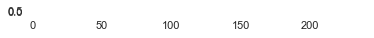

In [50]:
x = df2["tempo"]
y = df2["danceability"]

heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show();

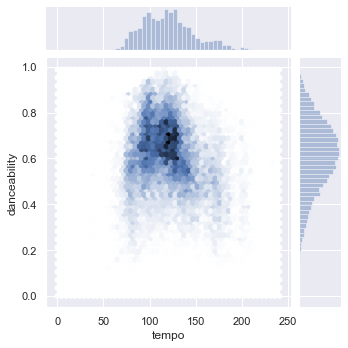

In [55]:

sns.jointplot(x="tempo", y="danceability", data=df2, height=5, kind="hex")